In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import json
import numpy as np
import seaborn as sns
import matplotlib
import torch
sns.set(style="whitegrid", font_scale=2.)
from matplotlib import rcParams
rcParams['lines.linewidth'] = 3.0

palette = sns.color_palette('bright')
print(len(palette))
ssgp_color = palette[0]
svi_color = palette[1]
exact_color = palette[2]
woodbury_color = palette[4]

font = {'size'   : 24}
matplotlib.rc('font', **font)

10


In [3]:
trials_list = ["wiski", "exact", "osvgp"]
colors = [woodbury_color, exact_color, ssgp_color]

In [10]:
def make_plot(
    title, suffix, prefix, trials_list, iteration=False, 
    iteration_only=False, seeds=4, ax=None, figsize=(6, 7.5)
):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor="w")
        
    results_list = []
    for name in trials_list:
        name_list = []
        for seed in range(seeds):
            name_list.append(
                torch.load(
                    prefix + name + "_seed_" + str(seed) + suffix,
                    map_location=torch.device("cpu")
                )["results"])
        results_list.append(name_list)
        
 
    plotting_list = []
    for i, name in enumerate(trials_list):
        current_time = []
        current_achieved = []
        for seed in range(seeds):
            if not iteration_only:
                current_time.append(torch.tensor(np.cumsum(results_list[i][seed][3].values)))
            else:
                current_time.append(torch.tensor(results_list[i][seed][3].rolling(window=20).mean()))
            current_achieved.append(torch.tensor(results_list[i][seed][5]))
        plotting_list.append([torch.stack(current_time), torch.stack(current_achieved)])
        
    for i, name in enumerate(trials_list):
        if not iteration:
            xaxs = plotting_list[i][0].mean(dim=0)
        else:
            xaxs = range(1500)
        yaxs = 0 if iteration_only else 1          
         
        label = name.upper() if name!="exact" else "Exact"
        ax.plot(
            xaxs, 
            plotting_list[i][yaxs].mean(dim=0),
            color=colors[i],
            label = label,
        )
        ax.fill_between(
            xaxs, 
            plotting_list[i][yaxs].mean(dim=0) - 1.96 * plotting_list[i][yaxs].std(dim=0),
            plotting_list[i][yaxs].mean(dim=0) + 1.96 * plotting_list[i][yaxs].std(dim=0),
            color=colors[i],
            alpha=0.3
        )
#     if not iteration:
#         ax.set_xlim((0., 3500))
    ax.legend(loc="lower right")
    if not iteration:
        ax.set_xlabel("Cumulative Time")
    else:
        ax.set_xlabel("Iteration")
    if not iteration_only:
        ax.set_ylabel("Best Achieved")
    else:
        ax.set_ylabel("Time per Iteration")
        
    ax.set_title(title)  

In [11]:
prefix = "../saved-experiments/bo_results/ucb/"

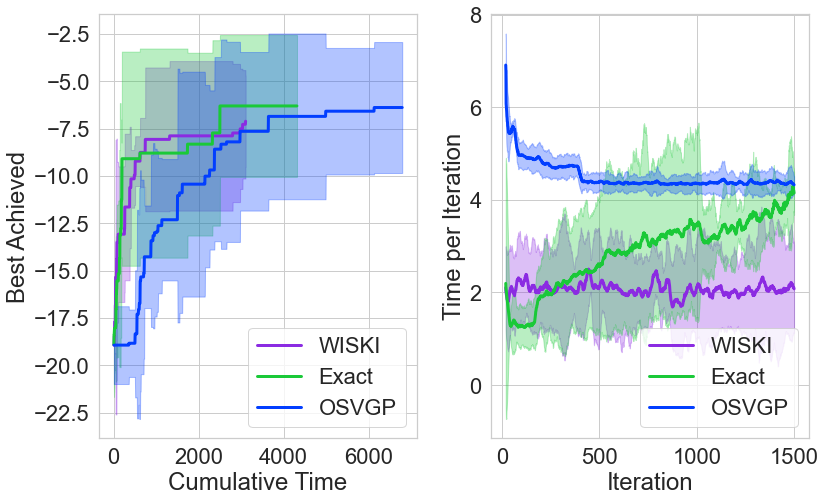

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7.5))

suffix = "_noise_10.0_Levy3.pt"
make_plot("", suffix, prefix, trials_list, ax = ax[0])

# suffix = "_noise_10.0_Levy3.pt"
# make_plot("Levy, sd = 10.0", suffix, prefix, trials_list, ax = ax[1])
suffix = "_noise_10.0_Levy3.pt"
make_plot("", suffix, prefix, trials_list, ax = ax[1], iteration_only=True, iteration=True)

plt.tight_layout()
plt.savefig("bayesopt_updated_figure.pdf", bbox_inches="tight")

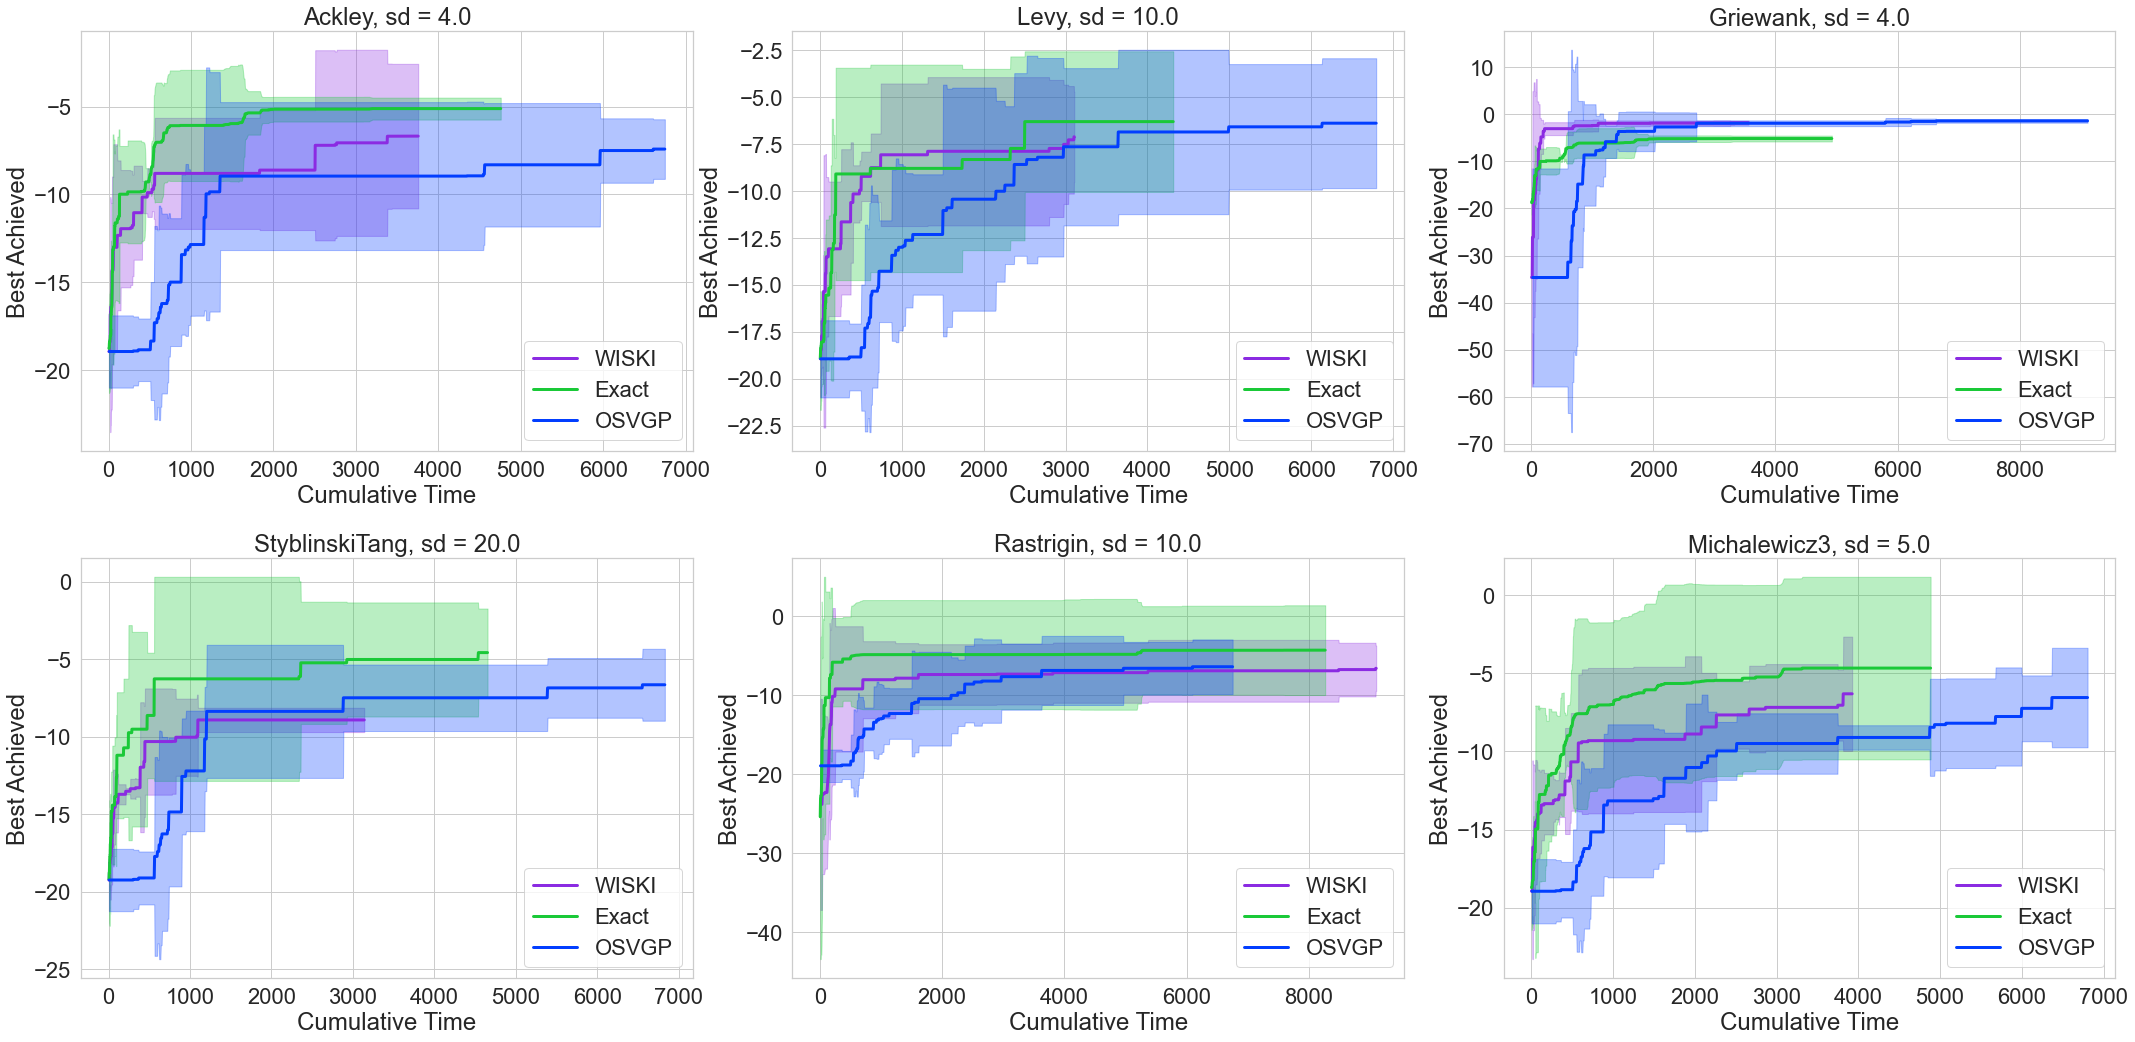

In [13]:
fig, ax = plt.subplots(2,3, figsize = (15*2, 15))
ax = ax.reshape(-1)

suffix = "_noise_4.0_Ackley3.pt"
make_plot("Ackley, sd = 4.0", suffix, prefix, trials_list, ax = ax[0])

suffix = "_noise_10.0_Levy3.pt"
make_plot("Levy, sd = 10.0", suffix, prefix, trials_list, ax = ax[1])

suffix = "_noise_4.0_Griewank3.pt"
make_plot("Griewank, sd = 4.0", suffix, prefix, trials_list, ax = ax[2])

suffix = "_noise_20.0_StyblinskiTang3.pt"
make_plot("StyblinskiTang, sd = 20.0", suffix, prefix, trials_list, ax = ax[3], seeds=3)

suffix = "_noise_10.0_Rastrigin3.pt"
make_plot("Rastrigin, sd = 10.0", suffix, prefix, trials_list, ax = ax[4])

suffix = "_noise_5.0_Michalewicz3.pt"
make_plot("Michalewicz3, sd = 5.0", suffix, prefix, trials_list, ax = ax[5])

plt.tight_layout()
plt.savefig("appendix_bayesopt_plots.pdf", bbox_inches="tight")

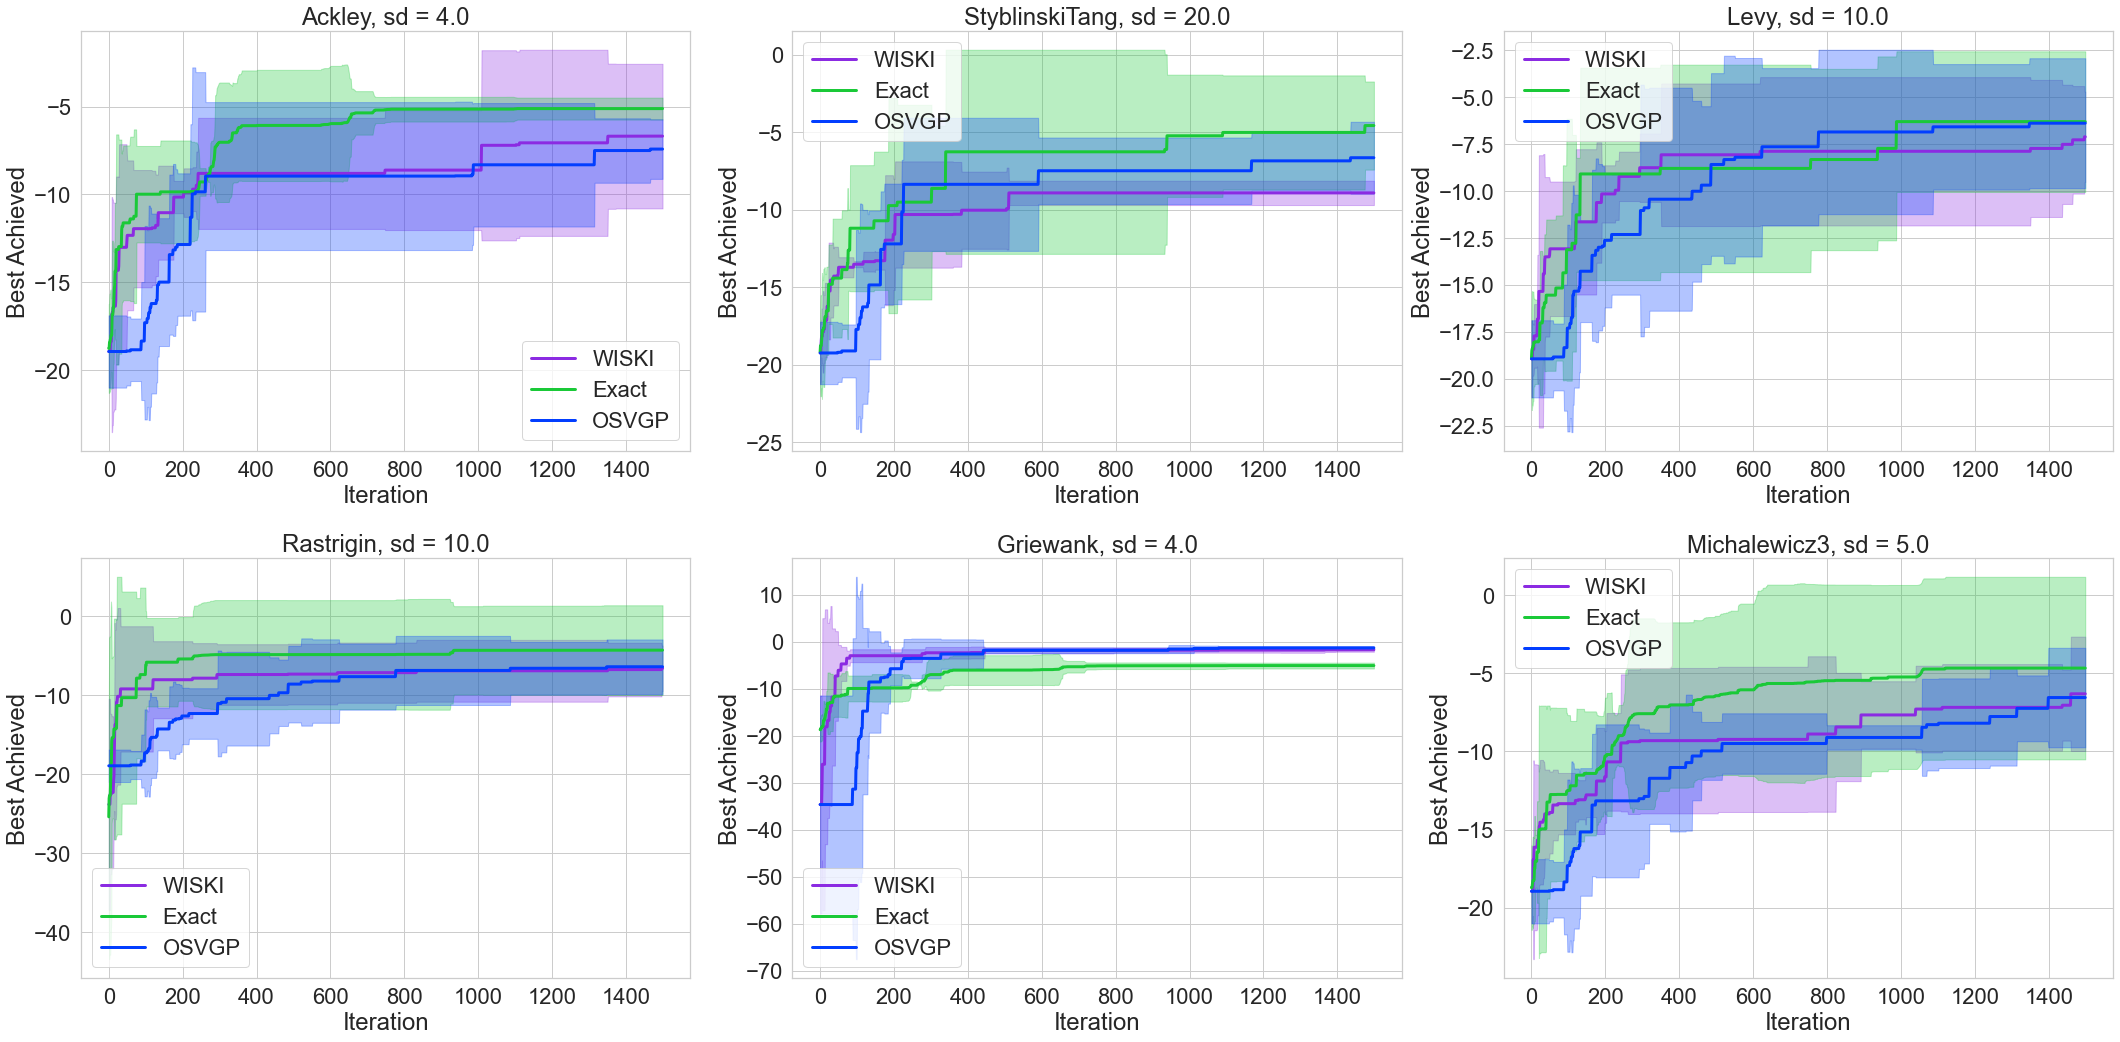

In [17]:
fig, ax = plt.subplots(2,3, figsize = (15*2, 15))
ax = ax.reshape(3,2)
suffix = "_noise_4.0_Ackley3.pt"
make_plot("Ackley, sd = 4.0", suffix, prefix, trials_list, ax = ax[0,0], iteration=True)

suffix = "_noise_10.0_Levy3.pt"
make_plot("Levy, sd = 10.0", suffix, prefix, trials_list, ax = ax[1,0], iteration=True)

suffix = "_noise_4.0_Griewank3.pt"
make_plot("Griewank, sd = 4.0", suffix, prefix, trials_list, ax = ax[2,0], iteration=True)

suffix = "_noise_20.0_StyblinskiTang3.pt"
make_plot("StyblinskiTang, sd = 20.0", suffix, prefix, trials_list, ax = ax[0,1], seeds=3, iteration=True)

suffix = "_noise_10.0_Rastrigin3.pt"
make_plot("Rastrigin, sd = 10.0", suffix, prefix, trials_list, ax = ax[1,1], iteration=True)

suffix = "_noise_5.0_Michalewicz3.pt"
make_plot("Michalewicz3, sd = 5.0", suffix, prefix, trials_list, ax = ax[2,1], iteration=True)

plt.tight_layout()

plt.savefig("bayesopt_iteration_complexity.pdf", bbox_inches="tight")

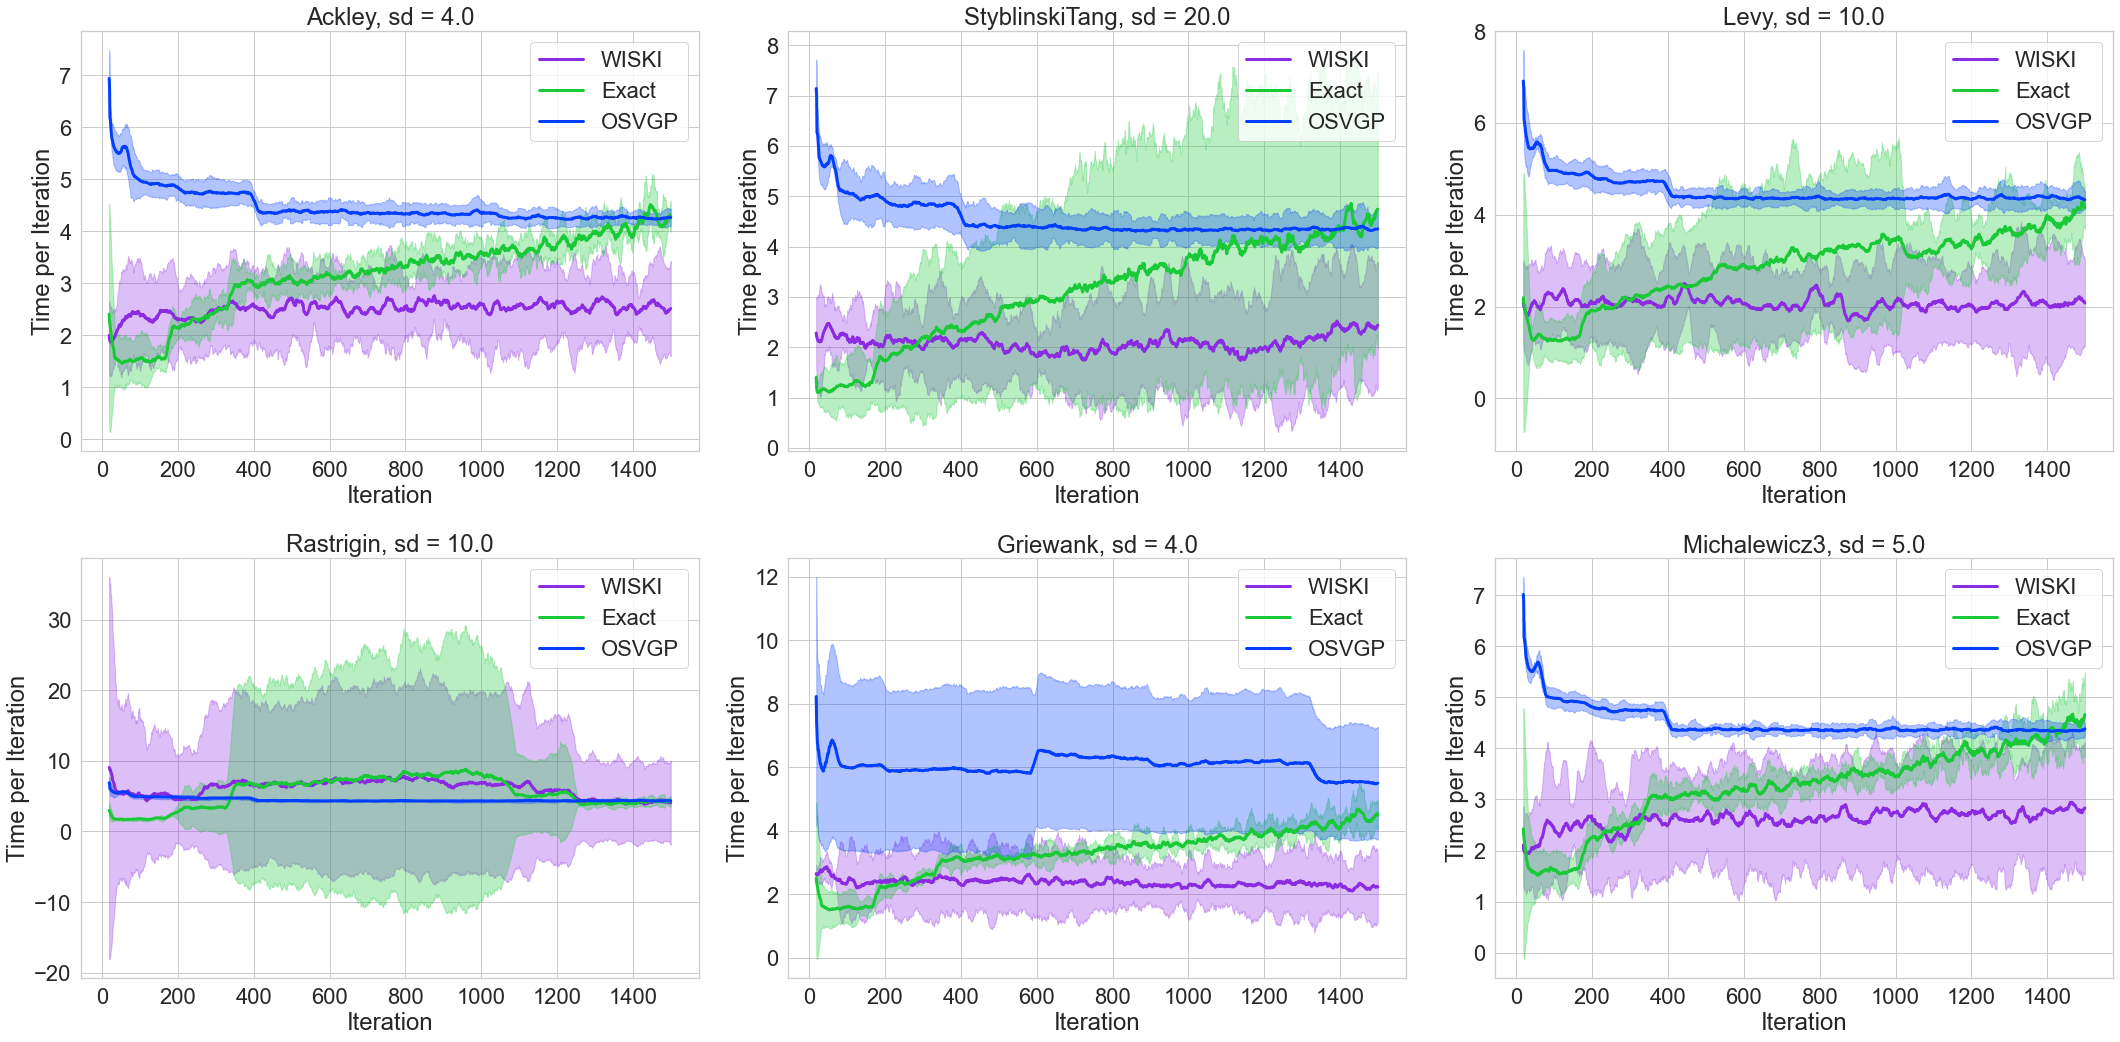

In [18]:
fig, ax = plt.subplots(2,3, figsize = (15*2, 15))
ax = ax.reshape(3,2)

suffix = "_noise_4.0_Ackley3.pt"
make_plot("Ackley, sd = 4.0", suffix, prefix, trials_list, ax = ax[0,0], iteration_only=True, iteration=True)

suffix = "_noise_10.0_Levy3.pt"
make_plot("Levy, sd = 10.0", suffix, prefix, trials_list, ax = ax[1,0], iteration_only=True, iteration=True)

suffix = "_noise_20.0_StyblinskiTang3.pt"
make_plot("StyblinskiTang, sd = 20.0", suffix, prefix, trials_list, ax = ax[0,1], seeds=3, iteration_only=True, iteration=True)

suffix = "_noise_10.0_Rastrigin3.pt"
make_plot("Rastrigin, sd = 10.0", suffix, prefix, trials_list, ax = ax[1,1], iteration_only=True, iteration=True)

suffix = "_noise_5.0_Michalewicz3.pt"
make_plot("Michalewicz3, sd = 5.0", suffix, prefix, trials_list, ax = ax[2,1], iteration_only=True, iteration=True)

suffix = "_noise_4.0_Griewank3.pt"
make_plot("Griewank, sd = 4.0", suffix, prefix, trials_list, ax = ax[2,0], iteration_only=True, iteration=True)

plt.tight_layout()
plt.savefig("bayesopt_time_per_iteration.pdf", bbox_inches="tight")